# Distribution Analysis and ML Training Script

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Distribution Analysis

In [2]:
# Read in data
breast_cancer_df = pd.read_csv('../diagnosis_data.csv')
breast_cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [7]:
value = str(breast_cancer_df['radius_mean'][1])

float("{0:.5f}".format( float(value) ))

20.57

In [3]:
# Drop last column since that isn't part of the dataset names
breast_cancer_df = breast_cancer_df.drop('Unnamed: 32', axis=1)

# Drop columns with no values to measure
breast_cancer_df = breast_cancer_df.drop(['id', 'diagnosis'], axis=1)

breast_cancer_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Max to check max number of digits
breast_cancer_df.max()

radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09744
radius_se                     2.87300
texture_se                    4.88500
perimeter_se                 21.98000
area_se                     542.20000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_worst              0.22260
compactness_worst             1.05800
concavity_wo

Mean
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Standard Error
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Worst
AxesSubplot(0.125,0.125;0.775x0.755)


/Users/Swaggert/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


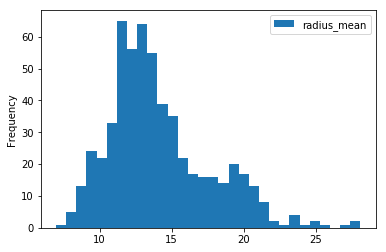

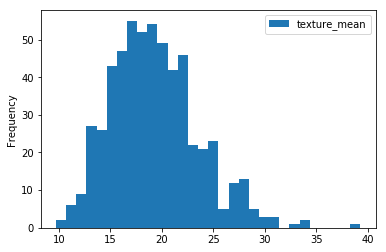

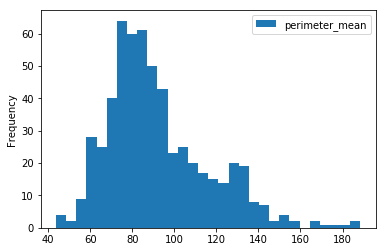

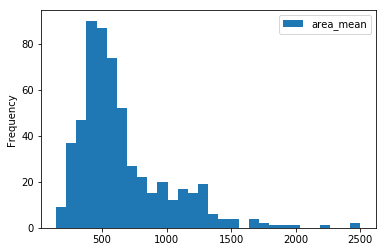

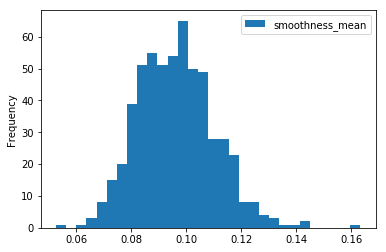

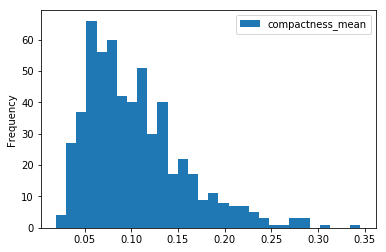

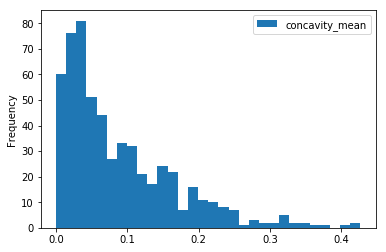

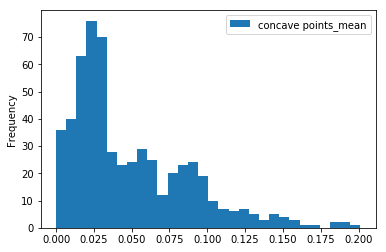

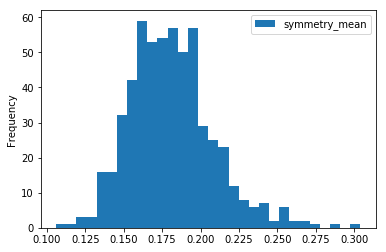

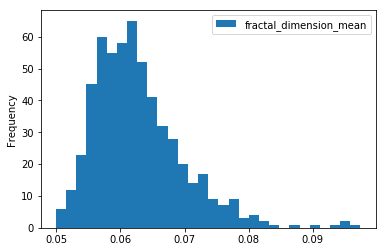

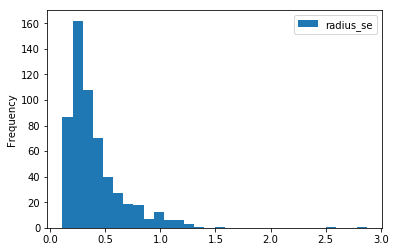

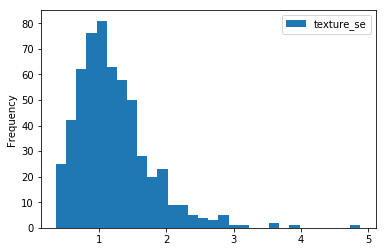

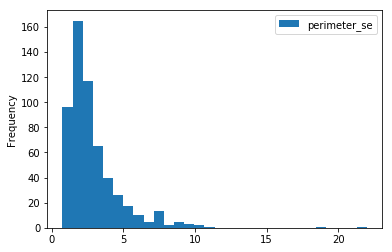

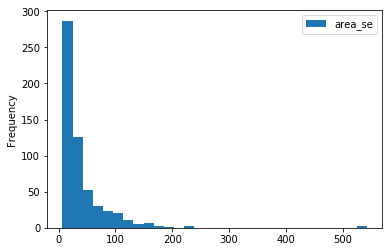

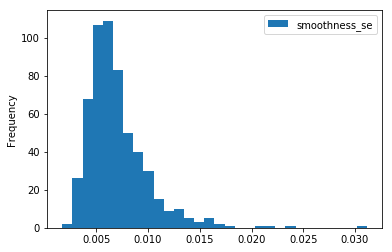

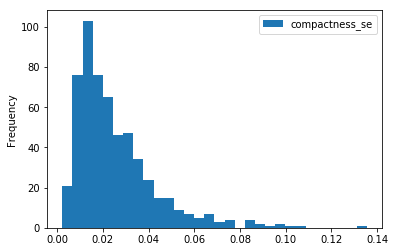

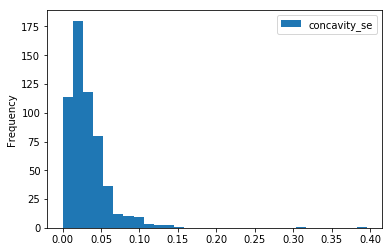

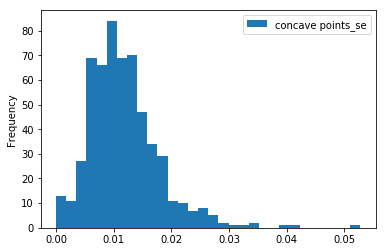

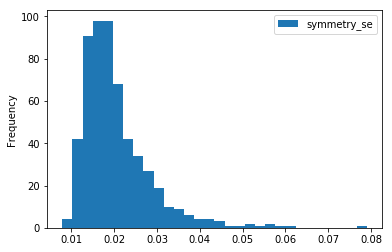

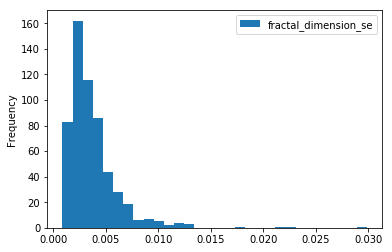

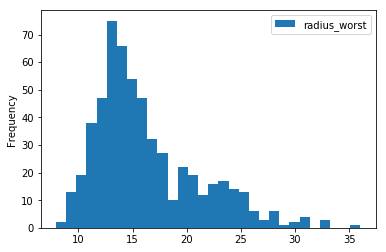

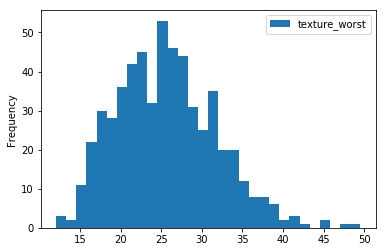

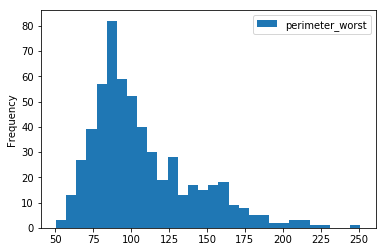

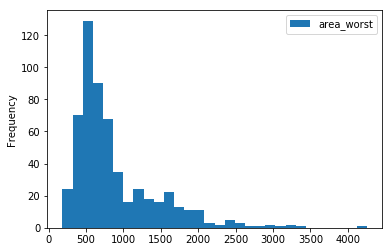

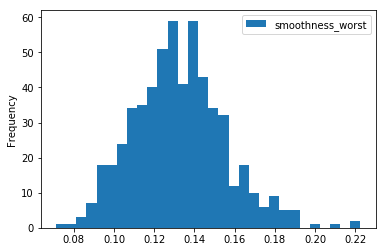

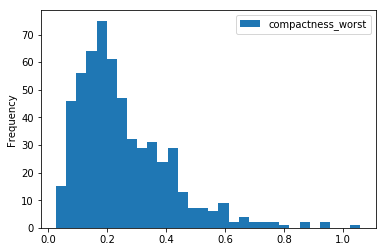

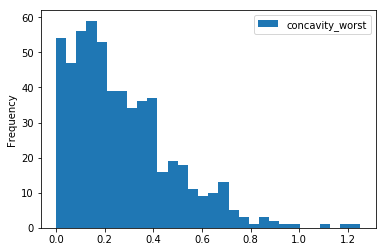

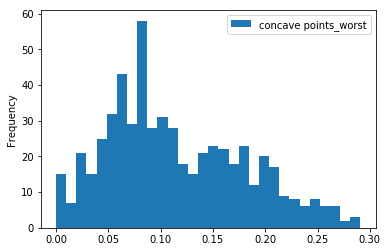

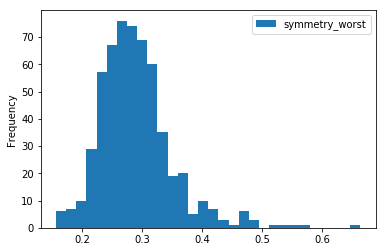

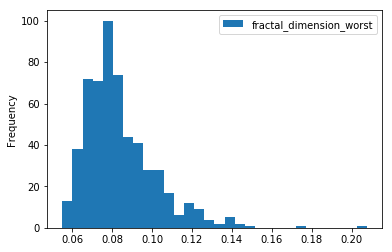

In [17]:
print("Mean")
print(breast_cancer_df[['radius_mean']].plot.hist(bins=30))
print(breast_cancer_df[['texture_mean']].plot.hist(bins=30))
print(breast_cancer_df[['perimeter_mean']].plot.hist(bins=30))
print(breast_cancer_df[['area_mean']].plot.hist(bins=30))
print(breast_cancer_df[['smoothness_mean']].plot.hist(bins=30))
print(breast_cancer_df[['compactness_mean']].plot.hist(bins=30))
print(breast_cancer_df[['concavity_mean']].plot.hist(bins=30))
print(breast_cancer_df[['concave points_mean']].plot.hist(bins=30))
print(breast_cancer_df[['symmetry_mean']].plot.hist(bins=30))
print(breast_cancer_df[['fractal_dimension_mean']].plot.hist(bins=30))

print("Standard Error")
print(breast_cancer_df[['radius_se']].plot.hist(bins=30))
print(breast_cancer_df[['texture_se']].plot.hist(bins=30))
print(breast_cancer_df[['perimeter_se']].plot.hist(bins=30))
print(breast_cancer_df[['area_se']].plot.hist(bins=30))
print(breast_cancer_df[['smoothness_se']].plot.hist(bins=30))
print(breast_cancer_df[['compactness_se']].plot.hist(bins=30))
print(breast_cancer_df[['concavity_se']].plot.hist(bins=30))
print(breast_cancer_df[['concave points_se']].plot.hist(bins=30))
print(breast_cancer_df[['symmetry_se']].plot.hist(bins=30))
print(breast_cancer_df[['fractal_dimension_se']].plot.hist(bins=30))

print("Worst")
print(breast_cancer_df[['radius_worst']].plot.hist(bins=30))
print(breast_cancer_df[['texture_worst']].plot.hist(bins=30))
print(breast_cancer_df[['perimeter_worst']].plot.hist(bins=30))
print(breast_cancer_df[['area_worst']].plot.hist(bins=30))
print(breast_cancer_df[['smoothness_worst']].plot.hist(bins=30))
print(breast_cancer_df[['compactness_worst']].plot.hist(bins=30))
print(breast_cancer_df[['concavity_worst']].plot.hist(bins=30))
print(breast_cancer_df[['concave points_worst']].plot.hist(bins=30))
print(breast_cancer_df[['symmetry_worst']].plot.hist(bins=30))
print(breast_cancer_df[['fractal_dimension_worst']].plot.hist(bins=30))

All Gaussian distribution, some with a right skew.

In [273]:
mu = breast_cancer_df.mean()
sigma = breast_cancer_df.std()
np.random.normal(mu, sigma).tolist()

[14.218363741002067,
 28.695060668657177,
 74.00613829093484,
 986.441605167228,
 0.10722968774162654,
 0.14686429474472373,
 -0.0370487601308202,
 0.025773422258126556,
 0.19036256534468068,
 0.05492961517878817,
 0.8092168975460118,
 0.5627028906670448,
 7.515626010832647,
 -2.8544564250755116,
 0.004558331166431103,
 0.01876861101034528,
 0.0907735384122535,
 0.012351392211470495,
 0.027531487816855268,
 0.003961007455105478,
 16.522930590584263,
 41.44597227072489,
 58.51653686235892,
 -40.68738635778277,
 0.0803095300931109,
 0.457684034527481,
 0.4261515406944677,
 0.23389558156885054,
 0.19482655841876273,
 0.10132815387900296]

## ML Training

In [2]:
# Read in data
breast_cancer_df = pd.read_csv('diagnosis_data.csv')

In [3]:
# Drop last column since that isn't part of the dataset names
#breast_cancer_df = breast_cancer_df.drop('Unnamed: 32', axis=1)

# Drop columns with not being used in model training/testing
breast_cancer_df = breast_cancer_df.drop(['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)

In [4]:
# This revalues M and Bs to 1 and 0s
for i in range(len(breast_cancer_df)):
    if breast_cancer_df.iloc[i, 0] == "M":
        breast_cancer_df.iloc[i, 0] = 1
    else:
        breast_cancer_df.iloc[i, 0] = 0

Get a summary on the current dataset.

In [36]:
# Get (rows, columns)
print(breast_cancer_df.shape)

# First five rows
breast_cancer_df.head(20)

(569, 11)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


After dropping the unwanted columns, we need to check if any values are missing or encoded differently to indicate a missing value.

In [6]:
# All rows of all columns contain real numbers
print(breast_cancer_df.isnull().values.any())

breast_cancer_df.applymap(np.isreal).all()

False


diagnosis                 True
radius_mean               True
texture_mean              True
perimeter_mean            True
area_mean                 True
smoothness_mean           True
compactness_mean          True
concavity_mean            True
concave points_mean       True
symmetry_mean             True
fractal_dimension_mean    True
dtype: bool

The values in the columns are good! Now to the model training, first load the libraries needed.

In [5]:
# Libraries for model training and testing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Model accuracy
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Model plotting
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

Give the model a quick test run before improving.

In [25]:
# Predictor columns for X, truth labels for Y
X = breast_cancer_df.drop('diagnosis', axis=1)  
Y = breast_cancer_df['diagnosis']  

# If 1s and 0s are being used for training
# Need them for roc_auc curve only
Y = Y.astype('int')


# Create train/test split
# stratify = Y --> explained in link, samples from each class so train/test sets are proportional in classes
#    it really seems to reduce precision for the M class quite a bit
# https://stackoverflow.com/questions/29082001/how-to-split-a-dataset-into-training-and-validation-set-keeping-ratio-between-cl
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [52]:
# Feature selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
    
# Train
clf.fit(X_train, y_train)

# Evaluates the most important features of the classification tree
# Concave points_mean seems to be the most important feature
print(clf.feature_importances_)

[ 0.0998047   0.04151795  0.11766621  0.11720743  0.03945648  0.07717344
  0.1881806   0.29000404  0.01518094  0.01380821]


In [10]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [7]:
# Drop the least important features
X = X.drop(['texture_mean', 'smoothness_mean', 'compactness_mean', 
             'symmetry_mean', 'fractal_dimension_mean'], axis=1)

# Recreate training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0, stratify = Y)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}

{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'class_weight': 'balanced', 'splitter': 'best'}

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}

#### Feature Selection

accuracy
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.924623115578

f1-score
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.89633880521

roc_auc
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3, 'splitter': 'best'}
0.96388378675

average precision
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.92819108641

precision
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}
0.940512559251

In [20]:
# Model to train
clf = DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, 
                                    random_state = 0, class_weight = "balanced")


# Train
clf.fit(X_train, y_train)

# Get predictions
x_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Accuracy measures
print("Model:")
print('DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, \nrandom_state = 0, class_weight = "balanced")')

print("\n\nfeature_importances_:")
print(clf.feature_importances_)

print("\n Accuracy:")
print(accuracy_score(y_test,y_pred)*100)
print("\n Confusion matrix:")
print(confusion_matrix(y_test, y_pred))  
print("\n Confusion matrix report:")
print(classification_report(y_test, y_pred))

print("\n Training accuracy:")
print(accuracy_score(y_train,x_train_pred)*100)
print("\n Testing accuracy:")
print(accuracy_score(y_test,y_pred)*100)

kfolds = cross_val_score(clf, X, Y, cv=10)
print("\n\n k-fold accuracy with ten folds:")
print(kfolds.mean())

Model:
DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, 
random_state = 0, class_weight = "balanced")


feature_importances_:
[ 0.00841918  0.          0.08878844  0.          0.90279238]

 Accuracy:
90.6432748538

 Confusion matrix:
[[98  9]
 [ 7 57]]

 Confusion matrix report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92       107
          1       0.86      0.89      0.88        64

avg / total       0.91      0.91      0.91       171


 Training accuracy:
91.7085427136

 Testing accuracy:
90.6432748538


 k-fold accuracy with ten folds:
0.917713464696


In [10]:
# Compare training accuracy to testing accuracy
print(accuracy_score(y_train,x_train_pred)*100)
print(accuracy_score(y_test,y_pred)*100)

91.7085427136
90.6432748538


Use Kfolds to get accurate idea for model performance.

In [11]:
# Kfolds array to average score to get true idea for model performance for model with slightly different parameters
kfolds = cross_val_score(clf, X, Y, cv=10)
print(kfolds.mean())

0.917713464696


Manual training process following:

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

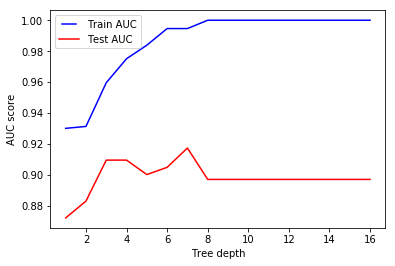

In [28]:
# First find the optimal max depth
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

A max depth of three is optimal for this particular decision tree.

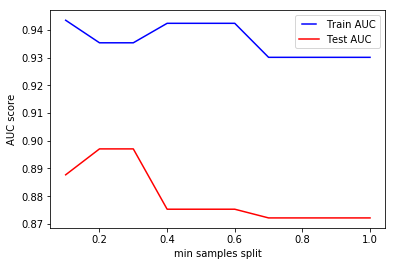

In [29]:
# If training using this method, set 
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion = "gini", random_state = 0, 
                               max_depth = 7, min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

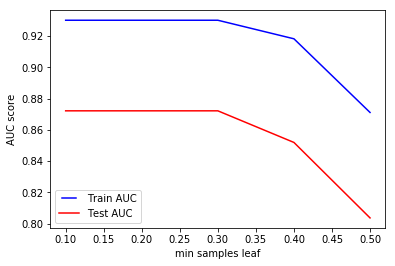

In [30]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion = "gini", random_state = 0, 
                               max_depth = 3, min_samples_split=0.3,
                               min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

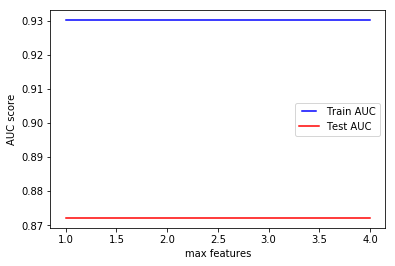

In [31]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion = "gini", random_state = 0, 
                               max_depth = 3, min_samples_split = 0.3,
                               min_samples_leaf = 0.3, max_features=None)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

GridSearch is one way to find the best parameters for our model quickly.

Source: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

About random_state:

https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn

In [46]:
from sklearn.metrics import average_precision_score, precision_score

In [66]:
print(len(X_train))
print(len(y_train))

398
398


In [26]:
# All combinations of these parameters will be tried out
# So n_total = n_criterion * n_max_depth * ...
grid_param = {  
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split' : [0.1, 0.2, 0.3, 0.4],
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4],
    'max_features' : [3, 4, 5, 6, 7, 8, 9, 10],
    'class_weight' : ["balanced", None]
}

# Code in the values you want to remain static, like the random_state
classifier = DecisionTreeClassifier(random_state=0)

# For scoring use accuracy, f1, roc_auc
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# cv is the number of kfold cross validations, executions = n_total * cv
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='precision',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  

# Get parameters that gave the best accuracy
best_parameters = gd_sr.best_params_  
print(best_parameters) 

# Get the best accuracy achieved
best_result = gd_sr.best_score_  
print(best_result)  

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}
0.940512559251


#### Running with feature selection

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.924623115578

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.89633880521

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3, 'splitter': 'best'}
0.96388378675

Different sets of parameters found when training:

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}

{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'class_weight': 'balanced', 'splitter': 'best'}

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}

With score = accuracy
Results 1:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.924623115578

Results 2:
{'class_weight': 'balanced', 'splitter': 'best'}
0.924623115578

Run at once:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}
0.927135678392


With score = f1
Results 1:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.89633880521

Results 2:
{'class_weight': 'balanced', 'splitter': 'best'}
0.89633880521

Run at once:
No difference


With score = roc_auc
Results 1:
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.965876508982

Results 2:
{'class_weight': 'balanced', 'splitter': 'best'}
0.965876508982

Run at once:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
0.965876508982

In [53]:
# Another way to evaluate
# Need to set outcome calss form M/B to 1/0 to use
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.87054614485981308

This stuff is for visualization when we get there.

In [63]:
#https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# conda install graphviz <-- Step I took that may make plotting possible

# Get the dot file data to turn into image
dot_data = tree.export_graphviz(clf_gini, 
                     out_file=None, 
                     feature_names=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
                     class_names=['Malignant (spreading)', 'Benign (not spreading)'],
                     filled=True, 
                     rounded=True)

# pydotplus is a Python Interface to Graphviz’s Dot language
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png()) #--> Display image
graph.write_png("test_tree.png") #--> Save image to a file, in same directory as notebook


#=====================================
# May be of use
pngfile = filename + ".png"

with open(dotfile, 'w') as f:
    export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

command = ["dot", "-Tpng", dotfile, "-o", pngfile]
try:
    subprocess.check_call(command)
except:
    exit("Could not run dot, ie graphviz, "
             "to produce visualization")

True

### Extra Cells

In [11]:
# Check that the decision tree plot leaf nodes are displaying the correct class
clf_gini.predict([[20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667]])
clf_gini.predict_proba([[20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667]])

array([[ 0.02419355,  0.97580645]])